![](encabezado.png)

---

# Reducción al polo de anomalías magnéticas

---

![](RP_telford.png)

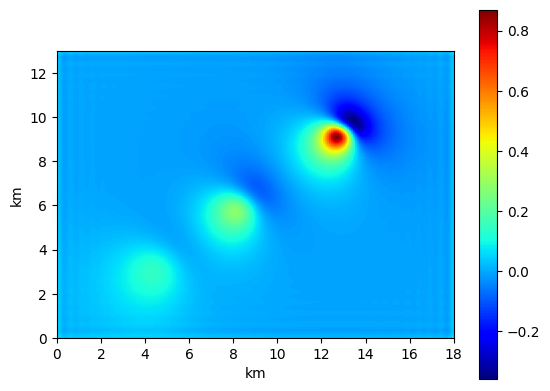

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Lectura del archivo
anom = np.loadtxt(r'AnomMagP7_filtered.txt')

# Según las especificaciones del proyecto, la anomalía tiene dimensiones de 18x13 km
Ny, Nx = np.shape(anom);
dx = 18/(Nx-1)
dy = 13/(Ny-1)

x = np.arange(0, Nx)*dx
y = np.arange(0, Ny)*dy
X, Y = np.meshgrid(x,y)

plt.imshow(anom, cmap='jet', origin='lower', extent=(min(x), max(x), min(y), max(y)))
plt.gca().set(xlabel='km', ylabel='km')
plt.colorbar()

plt.show()

## Transformación al dominio de Fourier

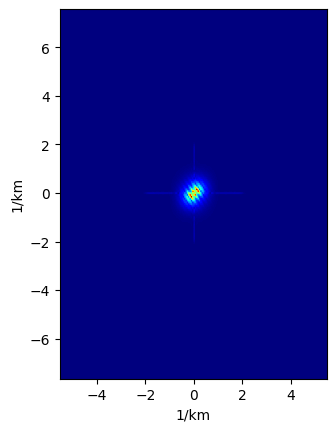

In [17]:
from numpy.fft import fft2, ifft2, fftshift

# Se obtienene los parámetros para graficar el espectro de Fourier
FNX = 1/(2*dx)
FNY = 1/(2*dy)
F0X = 1/(dx*Nx)
F0Y = 1/(dy*Ny)
p = np.arange(-FNX, FNX, F0X)
q = np.arange(-FNY, FNY, F0Y)

P, Q = np.meshgrid(p,q)

# Dado que el vector de frecuencias contiene un cero en medio, dará indeterminaciones al realizar la división, por lo que se agrega un valor infinitesimalmente pequeño para evitar este problema
P += 1e-30
Q += 1e-30

# Se obtiene el espectro en 2D de la anomalía
ANOM = fftshift(fft2(anom))

plt.imshow(np.abs(ANOM), cmap='jet', origin='lower', extent=(min(p), max(p), min(q), max(q)))
plt.gca().set(xlabel='1/km', ylabel='1/km')
plt.show()


## *Filtro de reducción al polo en el dominio de Fourier*

$$
F_{RP} = \frac{P^2 + Q^2}{\left(iP \cos I \cos D + iQ \cos I \sin D + \sqrt{P^2 + Q^2} \sin I\right)^2}
$$

donde $I$ es la inclinación del campo magnético y $D$ es su declinación, en radianes

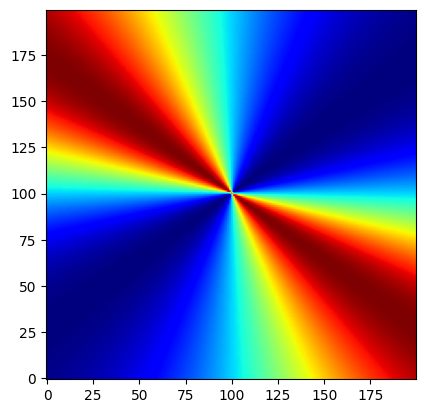

In [18]:
from numpy import cos, sin

# Los valores de inclinación y declinación variarán de lugar a lugar. Se pueden obtener con el IGRF si se conoce el lugar y fecha de realización del estudio
I = np.deg2rad(45)
D = np.deg2rad(45)

FRP = (P**2 + Q**2)/((1j*P*cos(I)*cos(D) + 1j*Q*cos(I)*sin(D) + np.sqrt(P**2+Q**2)*sin(I)))**2

plt.imshow(np.abs(FRP), origin='lower', cmap='jet')
plt.show()

# Aplicación del filtro

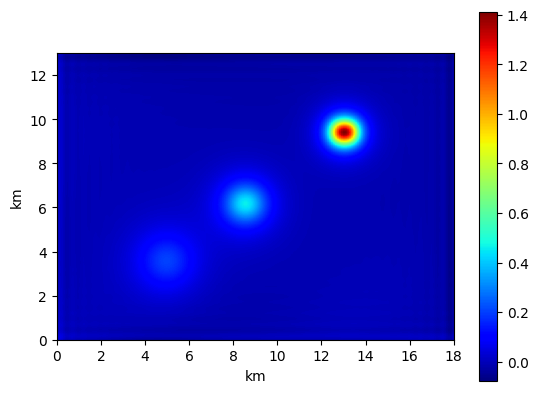

In [19]:
# Recordemos que la multiplicación en el dominio de Fourier equivale a la convolución en el dominio espacial, por lo que es más sencillo realizarlo en Fourier
ANOM_RP = FRP*ANOM

anom_rp = np.real(ifft2(fftshift(ANOM_RP)))

plt.imshow(anom_rp, cmap='jet', origin='lower', extent=(min(x), max(x), min(y), max(y)))
plt.gca().set(xlabel='km', ylabel='km')
plt.colorbar()
plt.show()